In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\ToyotaCorolla - MLR.csv")

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
# 1.preprocessing

In [5]:
#handling null values
df.dropna()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [6]:
df=pd.get_dummies(df,dtype=int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [7]:
#2.splitting the data

In [8]:
from sklearn.model_selection import train_test_split
x=df.drop('Price',axis=1)
y=df['Price']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
#3.creating a model

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
print(model.intercept_)
print(model.coef_)

-13821.299275879439
[-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -9.94759830e-14  5.51600710e+02
  2.58849583e+01 -4.34086718e+02 -5.02635474e+02  9.36722192e+02]


In [13]:
#4.evaluation

In [14]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'mse: {mse}')
print(f'r_squared: {r2}')

mse: 2203043.8231437025
r_squared: 0.8348888040611082


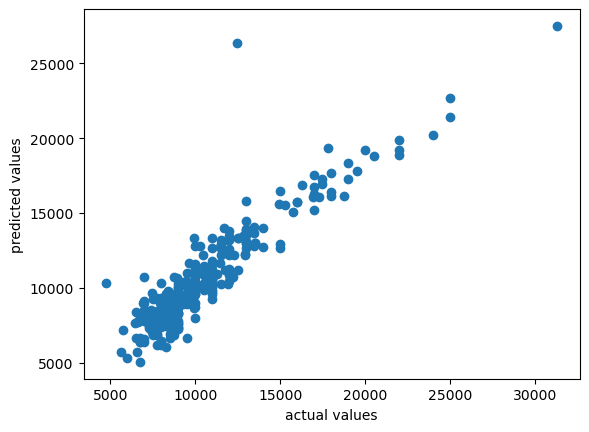

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [16]:
# 5.Lasso & Ridge methods

In [17]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [18]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    return mse,r2

In [19]:
#LASSO method
lasso = Lasso()
parameters={'alpha': [0.1, 1, 10, 100, 1000]}
lasso_m = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_mse, lasso_r2 = evaluate_model(lasso_m, x_train, y_train, x_test, y_test)
print(f'Lasso Regression - Mean Squared Error: {lasso_mse}')
print(f'Lasso Regression - R-squared: {lasso_r2}')

Lasso Regression - Mean Squared Error: 2203043.8231437025
Lasso Regression - R-squared: 0.8348888040611082


In [20]:
#RIDGE method
ridge = Ridge()
parameters={'alpha':[0.1, 1, 10, 100, 1000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_mse, ridge_r2=evaluate_model(ridge_regressor, x_train, y_train, x_test, y_test)
print(f'Ridge Regression - Mean Squared Error: {ridge_mse}')
print(f'Ridge Regression - R-squared: {ridge_r2}')

Ridge Regression - Mean Squared Error: 2203043.8231437025
Ridge Regression - R-squared: 0.8348888040611082


# Interview Questions:

# 1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques used in data preprocessing to transform features to a common scale,
which can improve the performance of machine learning algorithms.

Normalization and standardization are helpful in several ways:
>Improving Model Performance
>Handling Outliers
>Compatibility with Different Algorithms
>Stable Training

# 2.What techniques can be used to address multicollinearity in multiple linear regression?

In [ ]:
>Remove Highly Correlated Variables
>Principal Component Analysis (PCA)
>Ridge Regression
>Lasso Regression